# Classification Models with Keras


## Introduction


In this notebook, we will explore using the Keras library to construct models for classification tasks. We will work with the popular MNIST dataset, which consists of images.

The **MNIST database**, short for Modified National Institute of Standards and Technology database, is a comprehensive collection of handwritten digits often utilized for training various image processing systems and machine learning algorithms.

This dataset includes 60,000 training images and 10,000 testing images of digits handwritten by high school students and employees of the United States Census Bureau.

Furthermore, we will have the opportunity to compare traditional neural networks with convolutional neural networks, which we will delve into in the upcoming module.


### Classification Models with Keras

#### Objective for this Notebook:

1. Utilize the MNIST database for training various image processing systems.
2. Construct a Neural Network model.
3. Train and Test the Neural Network.

#### Project Description:

In this project, we will be developing a custom classifier using Keras for classifying images into three categories: Fire, Smoke, and Neutral (No Fire or Smoke). The MNIST database, typically used for digit recognition, will be repurposed to train our image classifier.



## Import Keras and Packages


Let's start by importing Keras and some of its modules.


In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
import numpy as np

In [2]:
# import the data
import matplotlib.pyplot as plt
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [3]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


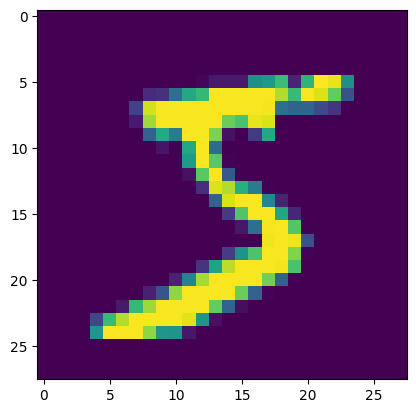

In [4]:
plt.imshow(X_train[0])

In order to use conventional neural networks (also known as fully connected or dense networks) for image classification tasks like those with the MNIST dataset, we need to flatten the images into one-dimensional vectors. Here's how we can flatten each image from its original 28x28 pixel format into a 1x784 vector:


In [5]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [7]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
print(y_test)

[7 2 1 ... 4 5 6]


In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [10]:
np.unique(y_test)

array([0., 1.])

In [11]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Build a Neural Network


In [12]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    #model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Input(shape=(num_pixels,)))  # Use Input layer to specify the shape
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<a id='item332'></a>


## Train and Test the Network


In [13]:
# build the model
model = classification_model()

# fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=0)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Let's print the accuracy and the corresponding error.


In [14]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9751999974250793% 
 Error: 0.024800002574920654


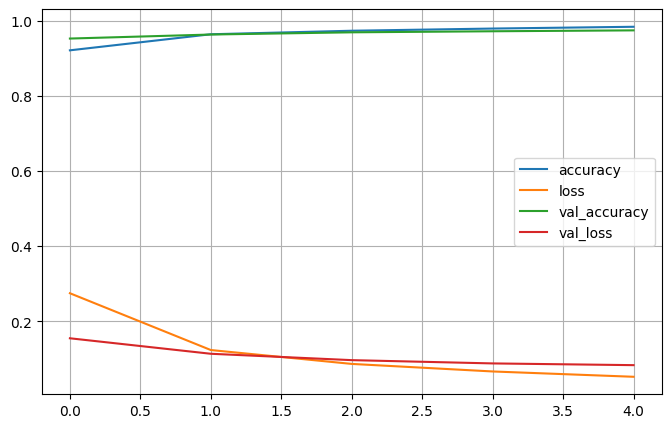

In [15]:
import pandas as pd

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.grid(True)

#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [16]:
model.save('classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.

When you are ready to use your model again, you use the load_model function from <strong>keras.models</strong>.


In [17]:
from keras.models import load_model

In [18]:
pretrained_model = load_model('classification_model.keras')